### 1. Predicition Task

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcolors

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [15]:
######### Load Dataset ######################3
df = pd.read_csv('data/DataTrain-2.csv')

In [16]:
######### Calculation of the RUL column ################

# Group by engine_id and find the maximum cycle for each engine
max_cycle_per_engine = df.groupby('engine_id')['cycle'].max().reset_index()

# Merge the maximum cycle back to the original DataFrame
df = pd.merge(df, max_cycle_per_engine, on='engine_id', suffixes=('', '_max'))

# Calculate RUL for each row
df['RUL'] = df['cycle_max'] - df['cycle']

# Drop the unnecessary columns if needed
df.drop(['cycle_max'], axis=1, inplace=True)

# Show the dataset
df.head(5)

,engine_id,cycle,set1,set2,set3,sensor_val1,sensor_val2,sensor_val3,sensor_val4,sensor_val5,...,sensor_val13,sensor_val14,sensor_val15,sensor_val16,sensor_val17,sensor_val18,sensor_val19,sensor_val20,sensor_val21,RUL
0,1,1,100.0,-0.0007,-0.0004,9046.19,521.66,8138.62,1589.70,554.36,...,2388.06,1.3,641.82,2388,8.4195,21.61,47.47,14.62,23.4190,191
1,1,2,100.0,0.0019,-0.0003,9044.07,522.28,8131.49,1591.82,553.75,...,2388.04,1.3,642.15,2388,8.4318,21.61,47.49,14.62,23.4236,190
2,1,3,100.0,-0.0043,0.0003,9052.94,522.42,8133.23,1587.99,554.26,...,2388.08,1.3,642.35,2388,8.4178,21.61,47.27,14.62,23.3442,189
3,1,4,100.0,0.0007,0.0000,9049.48,522.86,8133.83,1582.79,554.45,...,2388.11,1.3,642.35,2388,8.3682,21.61,47.13,14.62,23.3739,188
4,1,5,100.0,-0.0019,-0.0002,9055.15,522.19,8133.80,1582.85,554.00,...,2388.06,1.3,642.37,2388,8.4294,21.61,47.28,14.62,23.4044,187


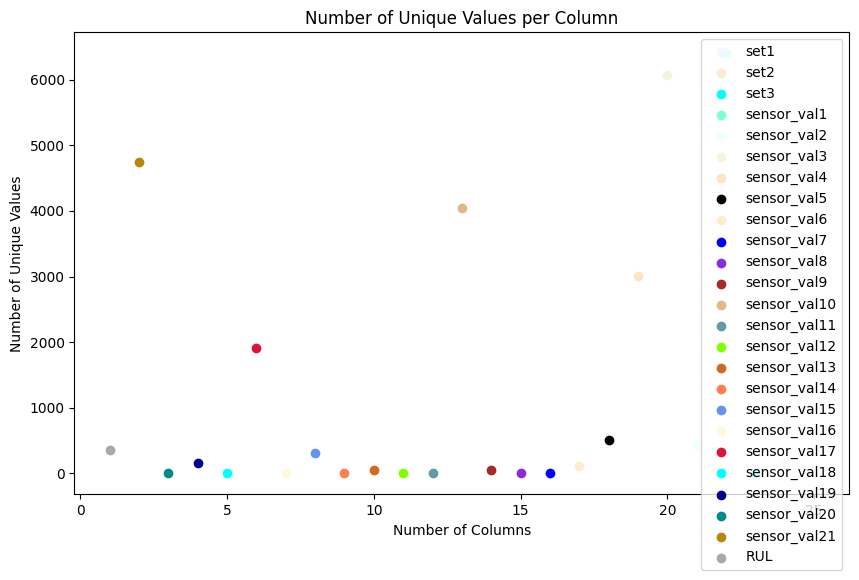

In [59]:
################################### Amount of unique values plot ##################################

# Drop irrelevant columns
columns_to_drop = ['engine_id', 'cycle',]
df_unique = df.drop(columns_to_drop, axis=1)

# Count unique values per column
unique_value_counts = df_unique.nunique()

# Get colors for each column
# colors = plt.cm.plasma(range(len(unique_value_counts)))


# Get a list of all recognized color names
all_colors = list(mcolors.CSS4_COLORS.keys())

# Select the first 26 colors from the list
colors = all_colors[:26]

# Plot
plt.figure(figsize=(10, 6))
for i, (column, count) in enumerate(unique_value_counts.items()):
    plt.scatter(len(unique_value_counts) - i, count, color=colors[i], label=column)

# Add legend in the top-right corner
plt.legend(loc='upper right')

# Set labels and title
plt.xlabel('Number of Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')

# Show plot
plt.show()


In [70]:
# Checking the amount of unique values for features that do not have a correlation with any other variable
print(f"Unique values of settings 1: {df['set1'].unique()}")
print(f"Unique values of sensor 7: {df['sensor_val7'].unique()}")
print(f"Unique values of sensor 8: {df['sensor_val8'].unique()}")
print(f"Unique values of sensor 11: {df['sensor_val11'].unique()}")
print(f"Unique values of sensor 14: {df['sensor_val14'].unique()}")
print(f"Unique values of sensor 16: {df['sensor_val16'].unique()}")
print(f"Unique values of sensor 20: {df['sensor_val20'].unique()}")
print(f"unique values of the sensor 18: {df['sensor_val18'].unique()}")

Unique values of settings 1: [100.]
Unique values of sensor 7: [518.67]
Unique values of sensor 8: [0.03]
Unique values of sensor 11: [100.]
Unique values of sensor 14: [1.3]
Unique values of sensor 16: [2388]
Unique values of sensor 20: [14.62]
unique values of the sensor 18: [21.61 21.6 ]


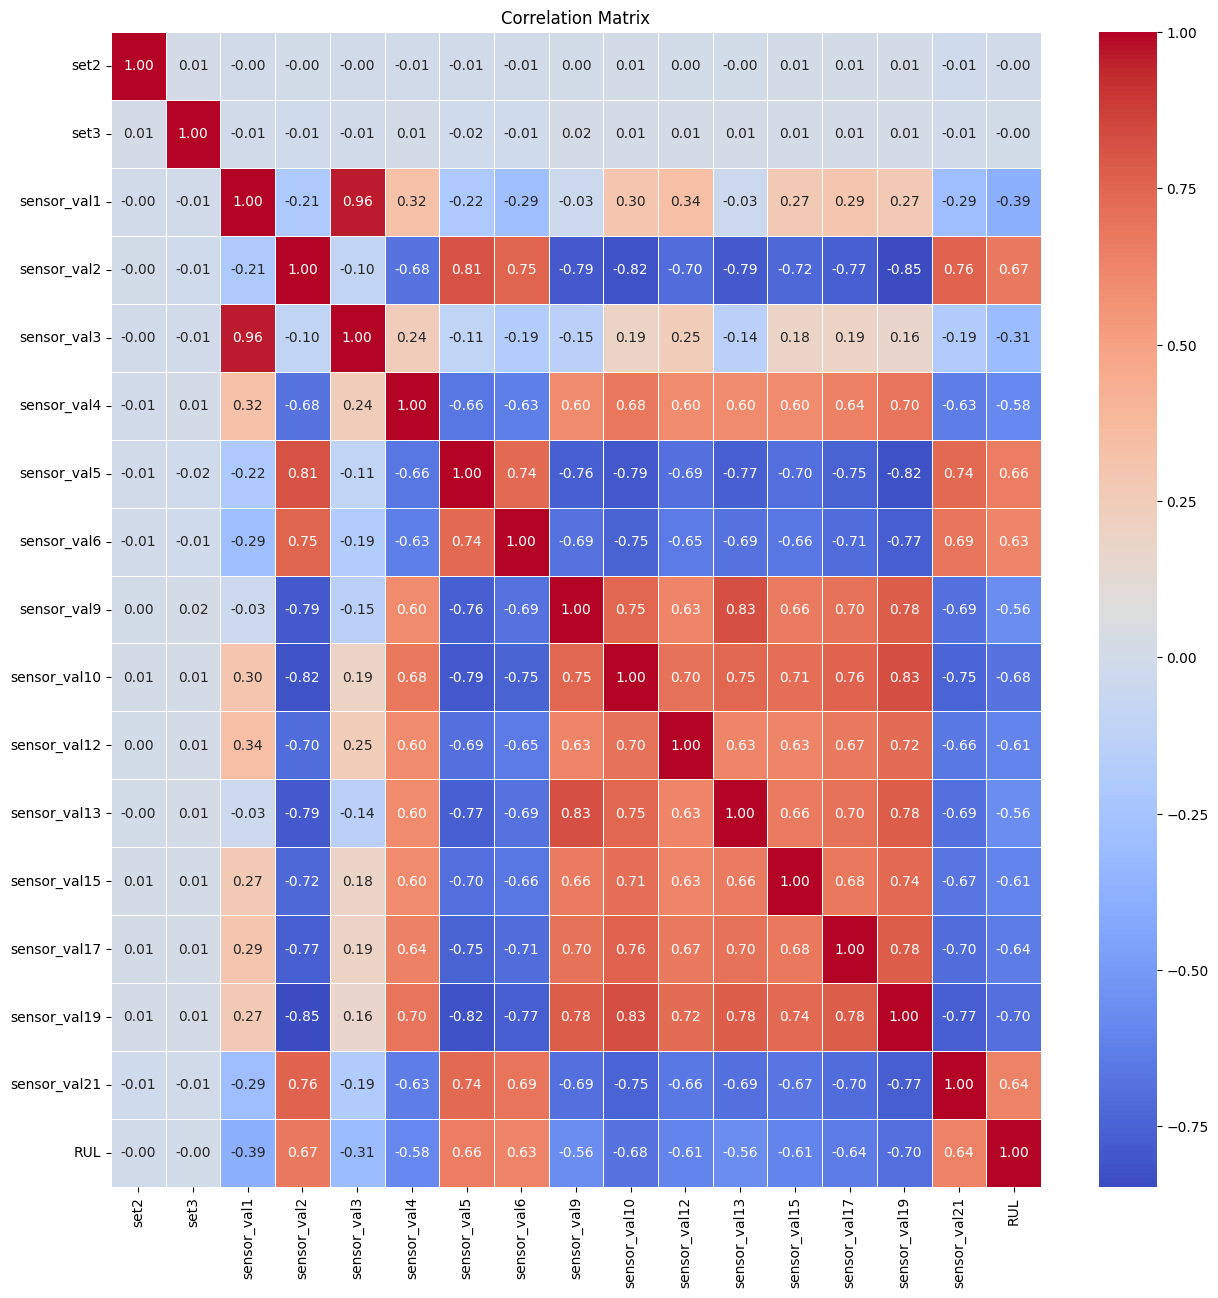

In [63]:
############ Correlation Matrix ######################
# Drop unnecessary columns for correlation analysis (e.g., engine_id, cycle)
columns_to_drop = ['engine_id', 'cycle','set1','sensor_val7','sensor_val8','sensor_val11','sensor_val14','sensor_val16','sensor_val18','sensor_val20']
df_corr = df.drop(columns_to_drop, axis=1)

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

######## Visualize correlation matrix #################

# Set the figure size
plt.figure(figsize=(15, 15))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set title
plt.title('Correlation Matrix')

# Show plot
plt.show()

<Figure size 1200x800 with 0 Axes>

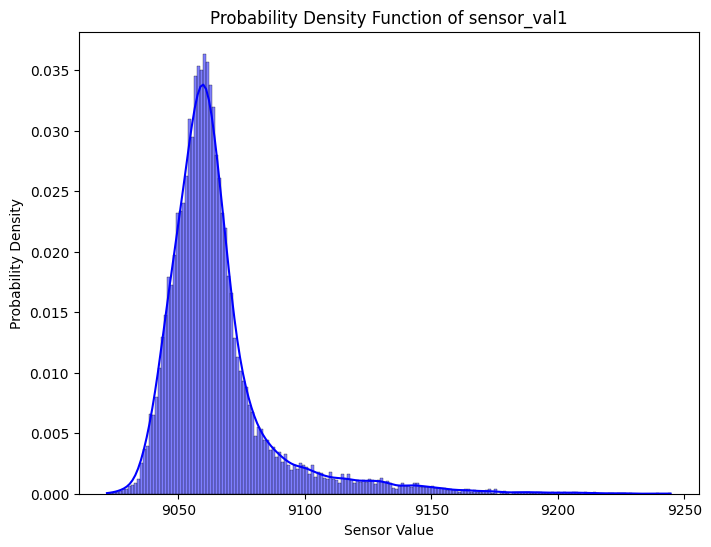

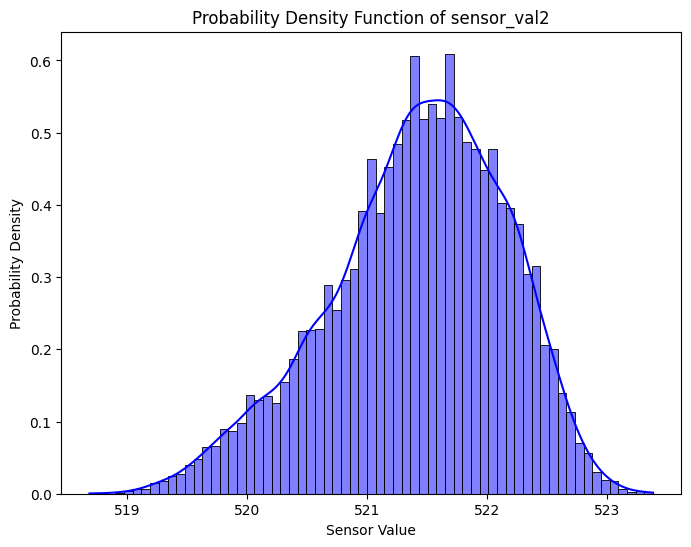

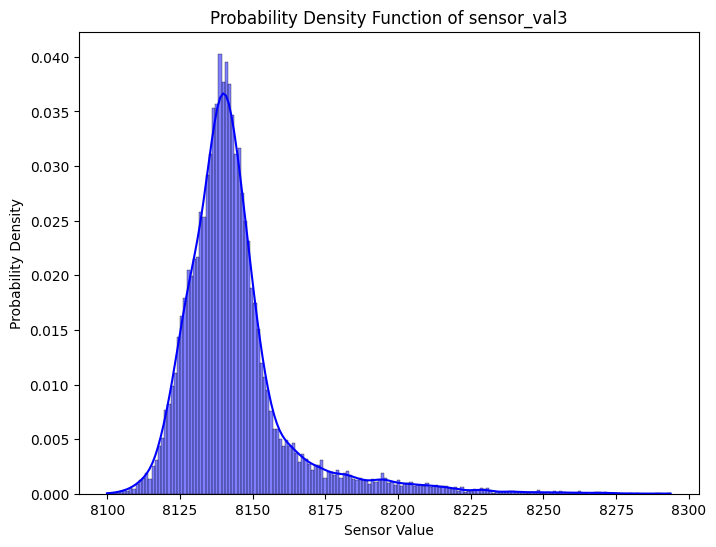

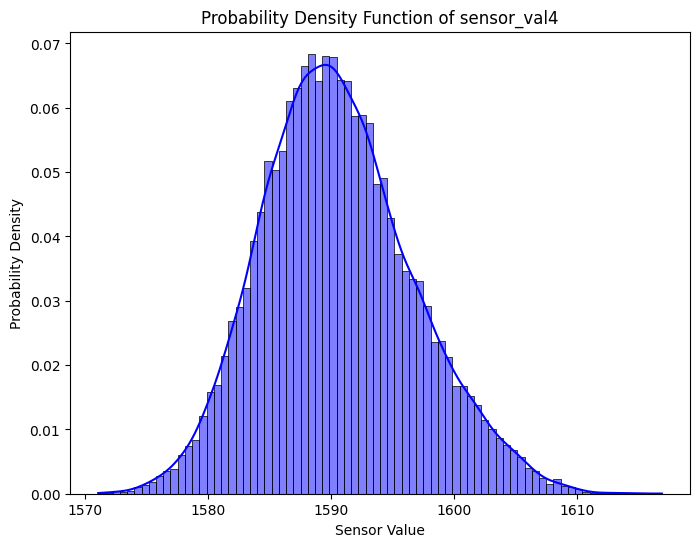

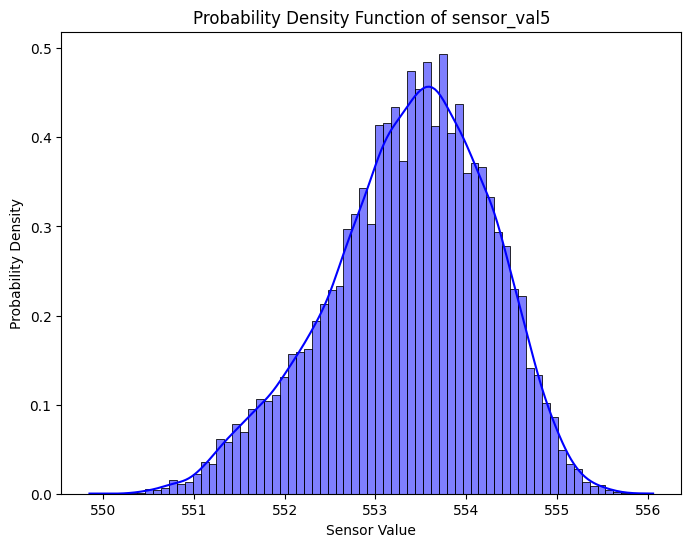

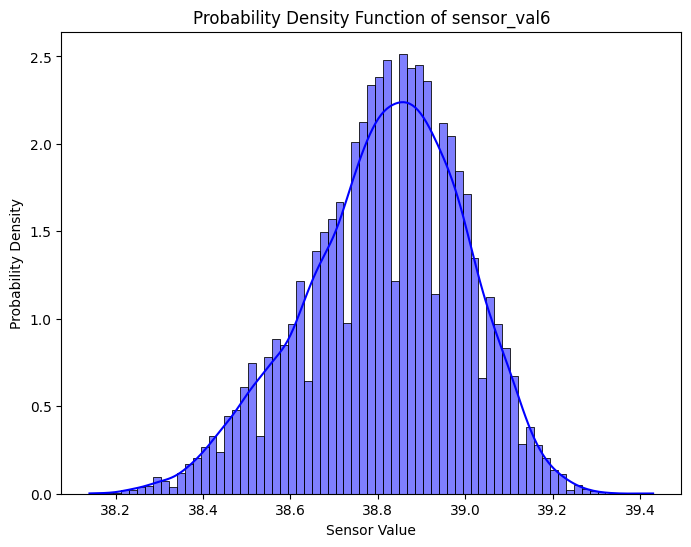

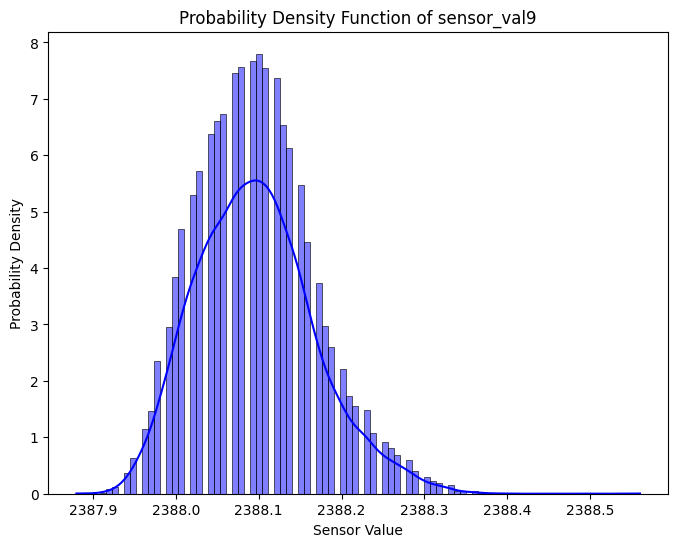

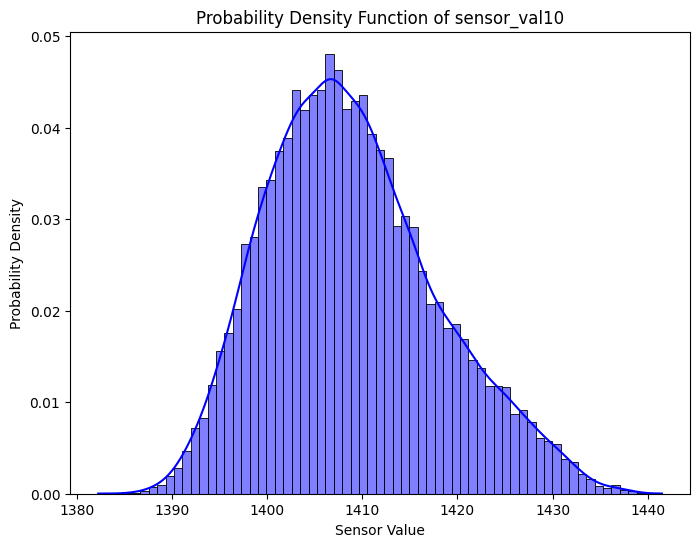

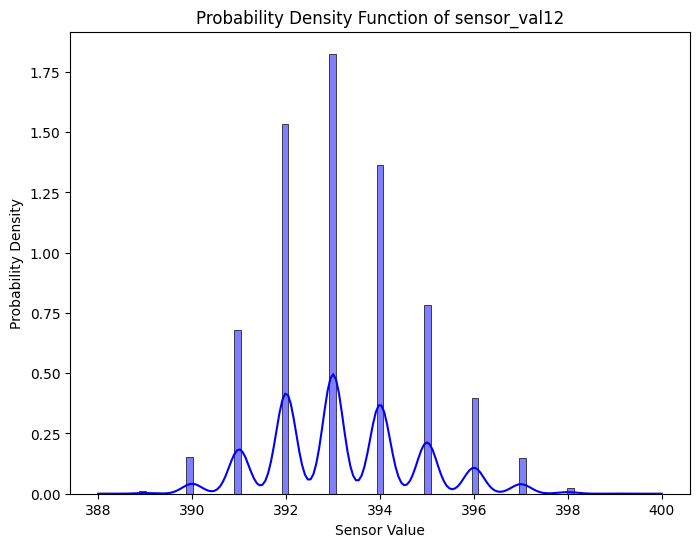

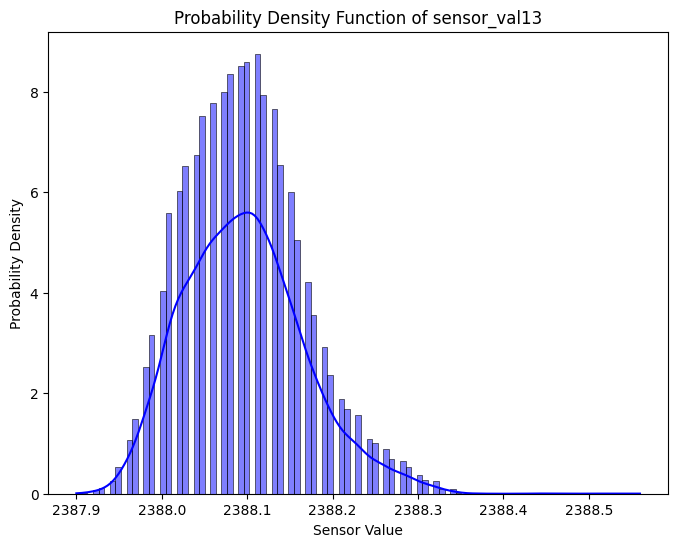

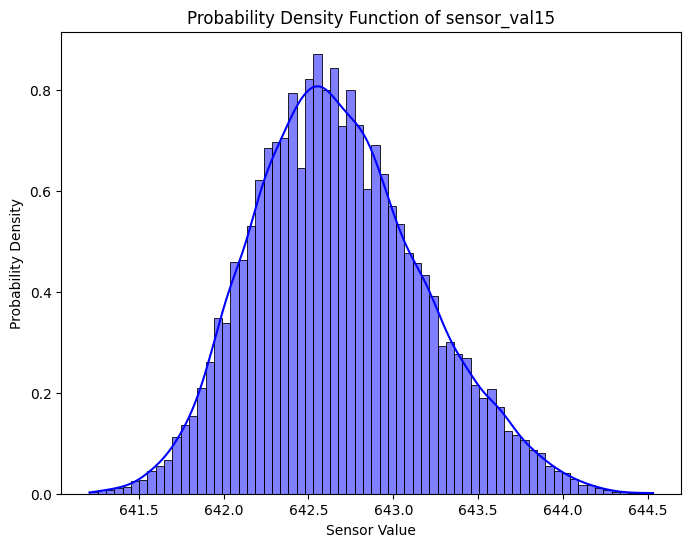

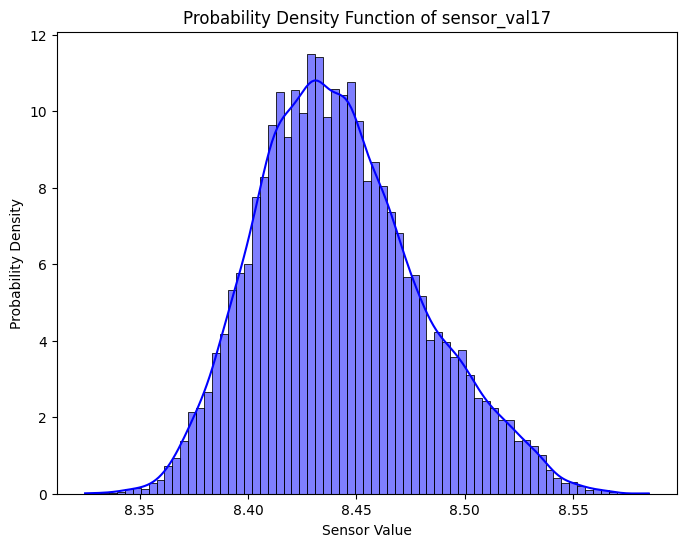

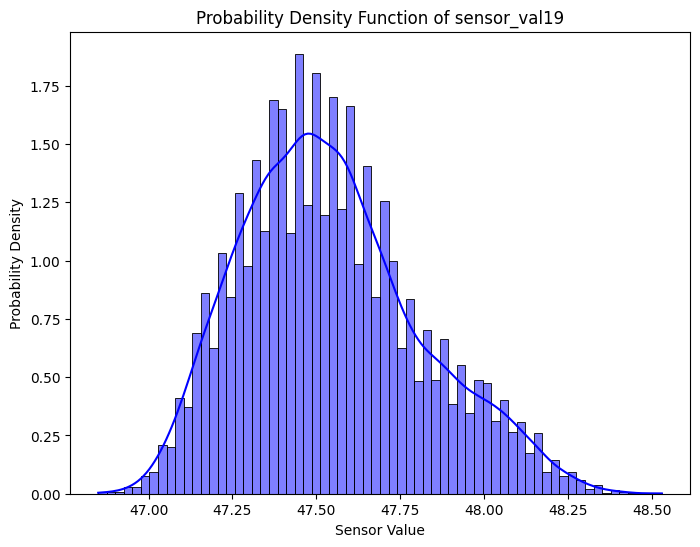

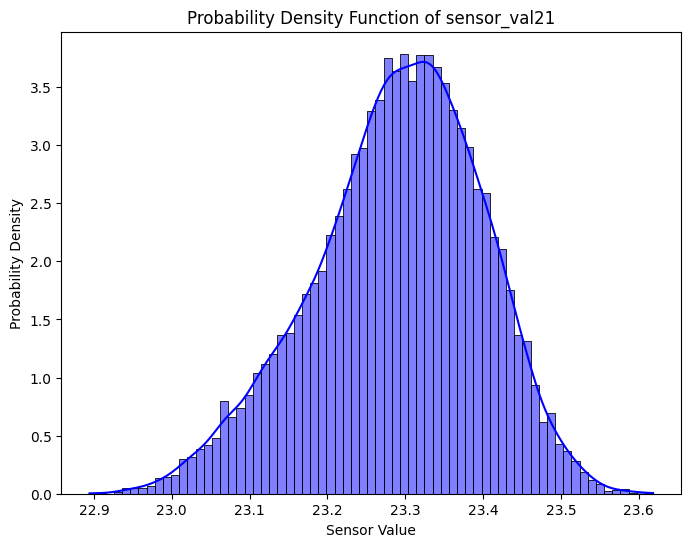

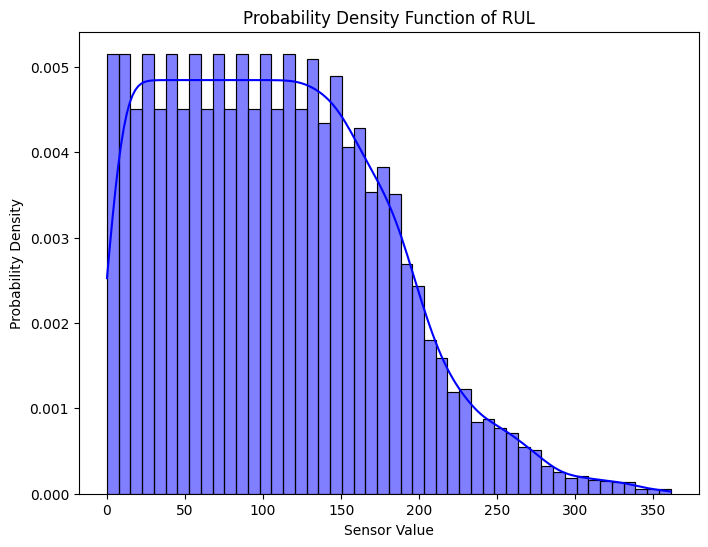

In [66]:
################################ PDF plots ###########################################
# Select only the sensor data columns
sensor_data = df_corr.iloc[:, 2:]

# Set figure size
plt.figure(figsize=(12, 8))

# Plot PDF for each sensor data feature
for column in sensor_data.columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each sensor data feature
    sns.histplot(sensor_data[column], kde=True, stat='density', color='blue', alpha=0.5)
    
    # Set title and labels
    plt.title(f'Probability Density Function of {column}')
    plt.xlabel('Sensor Value')
    plt.ylabel('Probability Density')
    
    # Show plot
    plt.show()


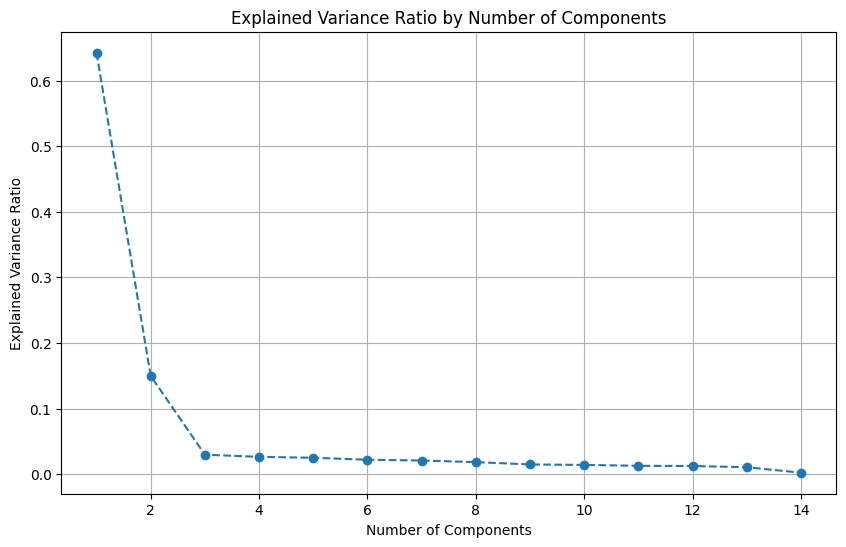

In [73]:
############################## PCA ########################################
# Drop unnecessary columns for the PCA analysis only include the sensor data after the correlation analysis (e.g., engine_id, cycle,set1,set2,set3)
columns_to_drop = ['engine_id', 'cycle','RUL','set1','set2','set3','sensor_val7','sensor_val8','sensor_val11','sensor_val14','sensor_val16','sensor_val18','sensor_val20']
df_pca = df.drop(columns_to_drop, axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# Initialize PCA
pca = PCA()

# Fit PCA
pca.fit(scaled_data)


# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

In [76]:
####################### Make Table for PCA analysis ##############################################
# Initialize DataFrame to store probabilities
explained_ratio_df = pd.DataFrame({
    'Number of Components': range(1, len(pca.explained_variance_ratio_) + 1),
    'Explained Variance Ratio': pca.explained_variance_ratio_.round(2)
})

# Calculate cumulative explained variance
explained_ratio_df['Cumulative Explained Variance'] = explained_ratio_df['Explained Variance Ratio'].cumsum().round(2)

# Print the DataFrame
print(explained_ratio_df)


    Number of Components  Explained Variance Ratio  \
0                      1                      0.64   
1                      2                      0.15   
2                      3                      0.03   
3                      4                      0.03   
4                      5                      0.02   
5                      6                      0.02   
6                      7                      0.02   
7                      8                      0.02   
8                      9                      0.01   
9                     10                      0.01   
10                    11                      0.01   
11                    12                      0.01   
12                    13                      0.01   
13                    14                      0.00   

    Cumulative Explained Variance  
0                            0.64  
1                            0.79  
2                            0.82  
3                            0.85  
4        

In [ ]:

# Based on the elbowmethod select the first two components.
print(pca.components_[0])

[ 0.10765317 -0.29441343  0.06962445  0.25214725 -0.28855793 -0.2737348
  0.27022131  0.29177658  0.26096377  0.27060788  0.26453224  0.27800331
  0.29954804 -0.27478495 -0.25124992]


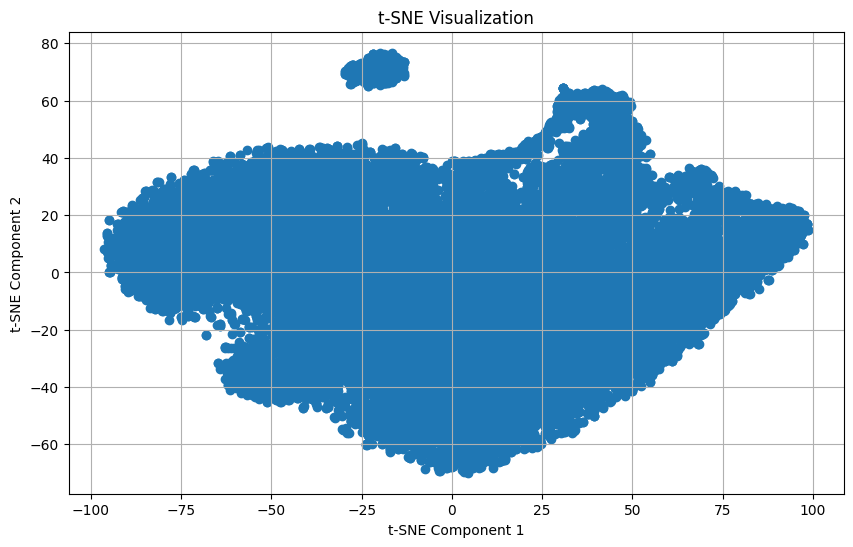

In [48]:
#################### T-SNE plot #######################################

from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit t-SNE
tsne_data = tsne.fit_transform(scaled_data)

# Plot t-SNE data
plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

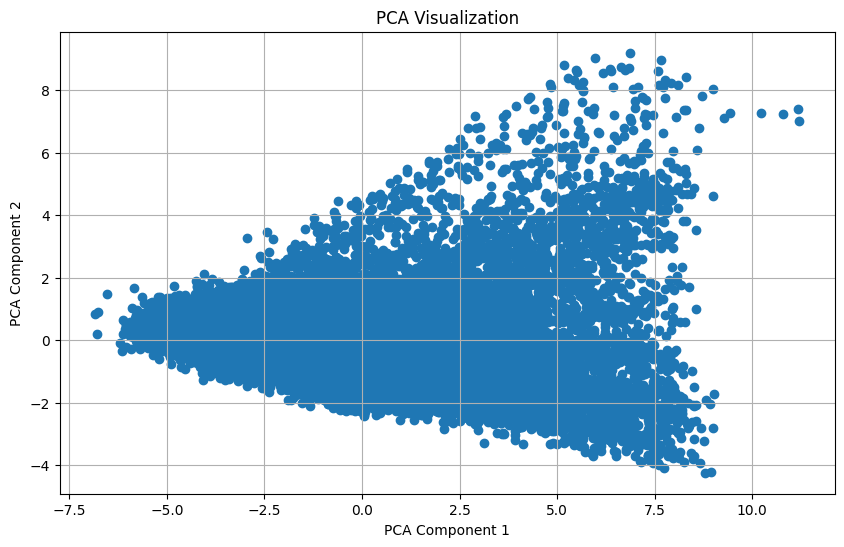

In [71]:
################# PCA Plot ######################################
# Transform the scaled data using the first two principal components
pca_data = pca.transform(scaled_data)[:, :2]

# Plot PCA data
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [79]:
############################## SKlearn Pipeline #####################################

# Create a pipeline with StandardScaler, PCA, and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('pca', PCA(n_components=3)),  # PCA for dimensionality reduction, keeping the first 3 components
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))  # RandomForestClassifier with initial hyperparameters
])

In [ ]:


# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# Predict on the test data
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)